In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")
import json

Some columns in the datasets are in Json format. For easier data wrangling, it is better to load such columns as Json.
Below are functions that would take care of this.

In [2]:
#define a function that loads json columns in movies dataset
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

#define a function that loads json columns in credits dataset
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


In [3]:
#load datasets
movies = load_tmdb_movies("tmdb_5000_movies.csv")
credits = load_tmdb_credits("tmdb_5000_credits.csv")

### Basic Data Description

In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#list out the column names
list(movies.columns)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [6]:
print(f'The movies data contains {movies.shape[0]} rows and {movies.shape[1]} columns')

The movies data contains 4803 rows and 20 columns


In [7]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [8]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


There are some irregularites in the data.Some coloumns have a minimum value of zero, which is highly unlikely. For instance, it is impossible for a movie to have 0 budget. 
Also, the disperity in popularity is high, considering the mean value and the maximum value. This suggests outliers in the column. 

In [9]:
#no of unique titles
movies.title.nunique()

4800

There are three duplicated titles in the dataset.

In [10]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

The columns with significant missing values won't be needed in this analysis. 

In [11]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [12]:
print(f'The credits data contains {credits.shape[0]} rows and {credits.shape[1]} columns')

The credits data contains 4803 rows and 4 columns


In [13]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [14]:
#rename column name for easy merging
movies.rename(columns={"id": "movie_id"}, inplace=True)

 ### Extracting Information from the Json Columns
 

In [15]:
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['genres']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['keywords']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['production_companies']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['production_countries']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['spoken_languages']], axis=1)


0                         [None, None]
1                               [None]
2       [None, None, None, None, None]
3                               [None]
4                               [None]
                     ...              
4798                            [None]
4799                                []
4800                            [None]
4801                            [None]
4802                            [None]
Length: 4803, dtype: object

In [16]:
genres= []
movies["genres"].apply(lambda x: genres.extend(x))
genres = pd.DataFrame(genres)

keywords = []
movies["keywords"].apply(lambda x: keywords.extend(x))
keywords = pd.DataFrame(keywords)


production_countries = []
movies['production_countries'].apply(lambda x: production_countries.extend(x))
production_countries = pd.DataFrame(production_countries)

spoken_languages = []
movies['spoken_languages'].apply(lambda x: spoken_languages.extend(x))
spoken_languages = pd.DataFrame(spoken_languages)

In [17]:
production_companies = []
movies['production_companies'].apply(lambda x: production_companies.extend(x))
production_companies = pd.DataFrame(production_companies)


In [18]:
credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['cast']], axis=1)
credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['crew']], axis=1)
credits.apply(lambda row: [person.update({'order': order}) for order, person in enumerate(row['crew'])], axis=1)

cast_list = []
credits["cast"].apply(lambda x: cast_list.extend(x))
cast = pd.DataFrame(cast_list)
cast["type"] = "cast"

crew_list = []
credits["crew"].apply(lambda x: crew_list.extend(x))
crew = pd.DataFrame(crew_list)
crew["type"] = "crew"

people = pd.concat([cast, crew], ignore_index=True, sort=True)

In [19]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [20]:
credits['director']= credits['crew'].apply(get_director)


In [21]:
cast[:10]

,cast_id,character,credit_id,gender,id,name,order,movie_id,type
0,242,Jake Sully,5602a8a7c3a3685532001c9a,2,65731,Sam Worthington,0,19995,cast
1,3,Neytiri,52fe48009251416c750ac9cb,1,8691,Zoe Saldana,1,19995,cast
2,25,Dr. Grace Augustine,52fe48009251416c750aca39,1,10205,Sigourney Weaver,2,19995,cast
3,4,Col. Quaritch,52fe48009251416c750ac9cf,2,32747,Stephen Lang,3,19995,cast
4,5,Trudy Chacon,52fe48009251416c750ac9d3,1,17647,Michelle Rodriguez,4,19995,cast
5,8,Selfridge,52fe48009251416c750ac9e1,2,1771,Giovanni Ribisi,5,19995,cast
6,7,Norm Spellman,52fe48009251416c750ac9dd,2,59231,Joel David Moore,6,19995,cast
7,9,Moat,52fe48009251416c750ac9e5,1,30485,CCH Pounder,7,19995,cast
8,11,Eytukan,52fe48009251416c750ac9ed,2,15853,Wes Studi,8,19995,cast
9,10,Tsu'Tey,52fe48009251416c750ac9e9,2,10964,Laz Alonso,9,19995,cast


### Analyses and Visualizations

In [22]:
from wordcloud import WordCloud, STOPWORDS

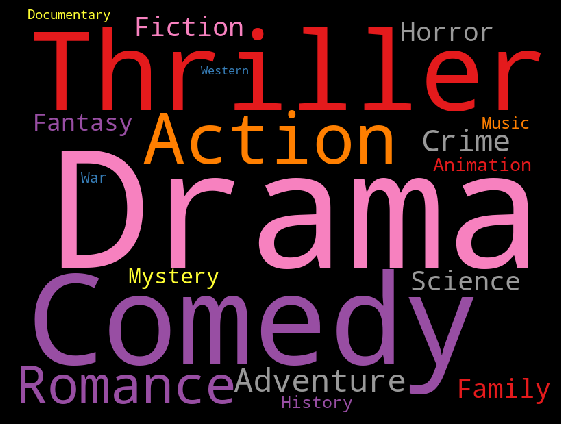

In [23]:
#create a wordcloud for the movie genries
genre_names = genres['name']

unique_string=(" ").join(genre_names)
wordcloud = WordCloud(collocations=False, prefer_horizontal = 1, width=800,
                        height=600,
                        min_font_size=14,
                        background_color='black',
                        colormap="Set1").generate(unique_string)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()

In [24]:
keywords['name'].nunique(),genres['name'].nunique(), production_companies['name'].nunique(), production_countries['name'].nunique()

(9813, 20, 5017, 88)

### Top Production companies and Countries;  Prominent Spoken language and Keywords

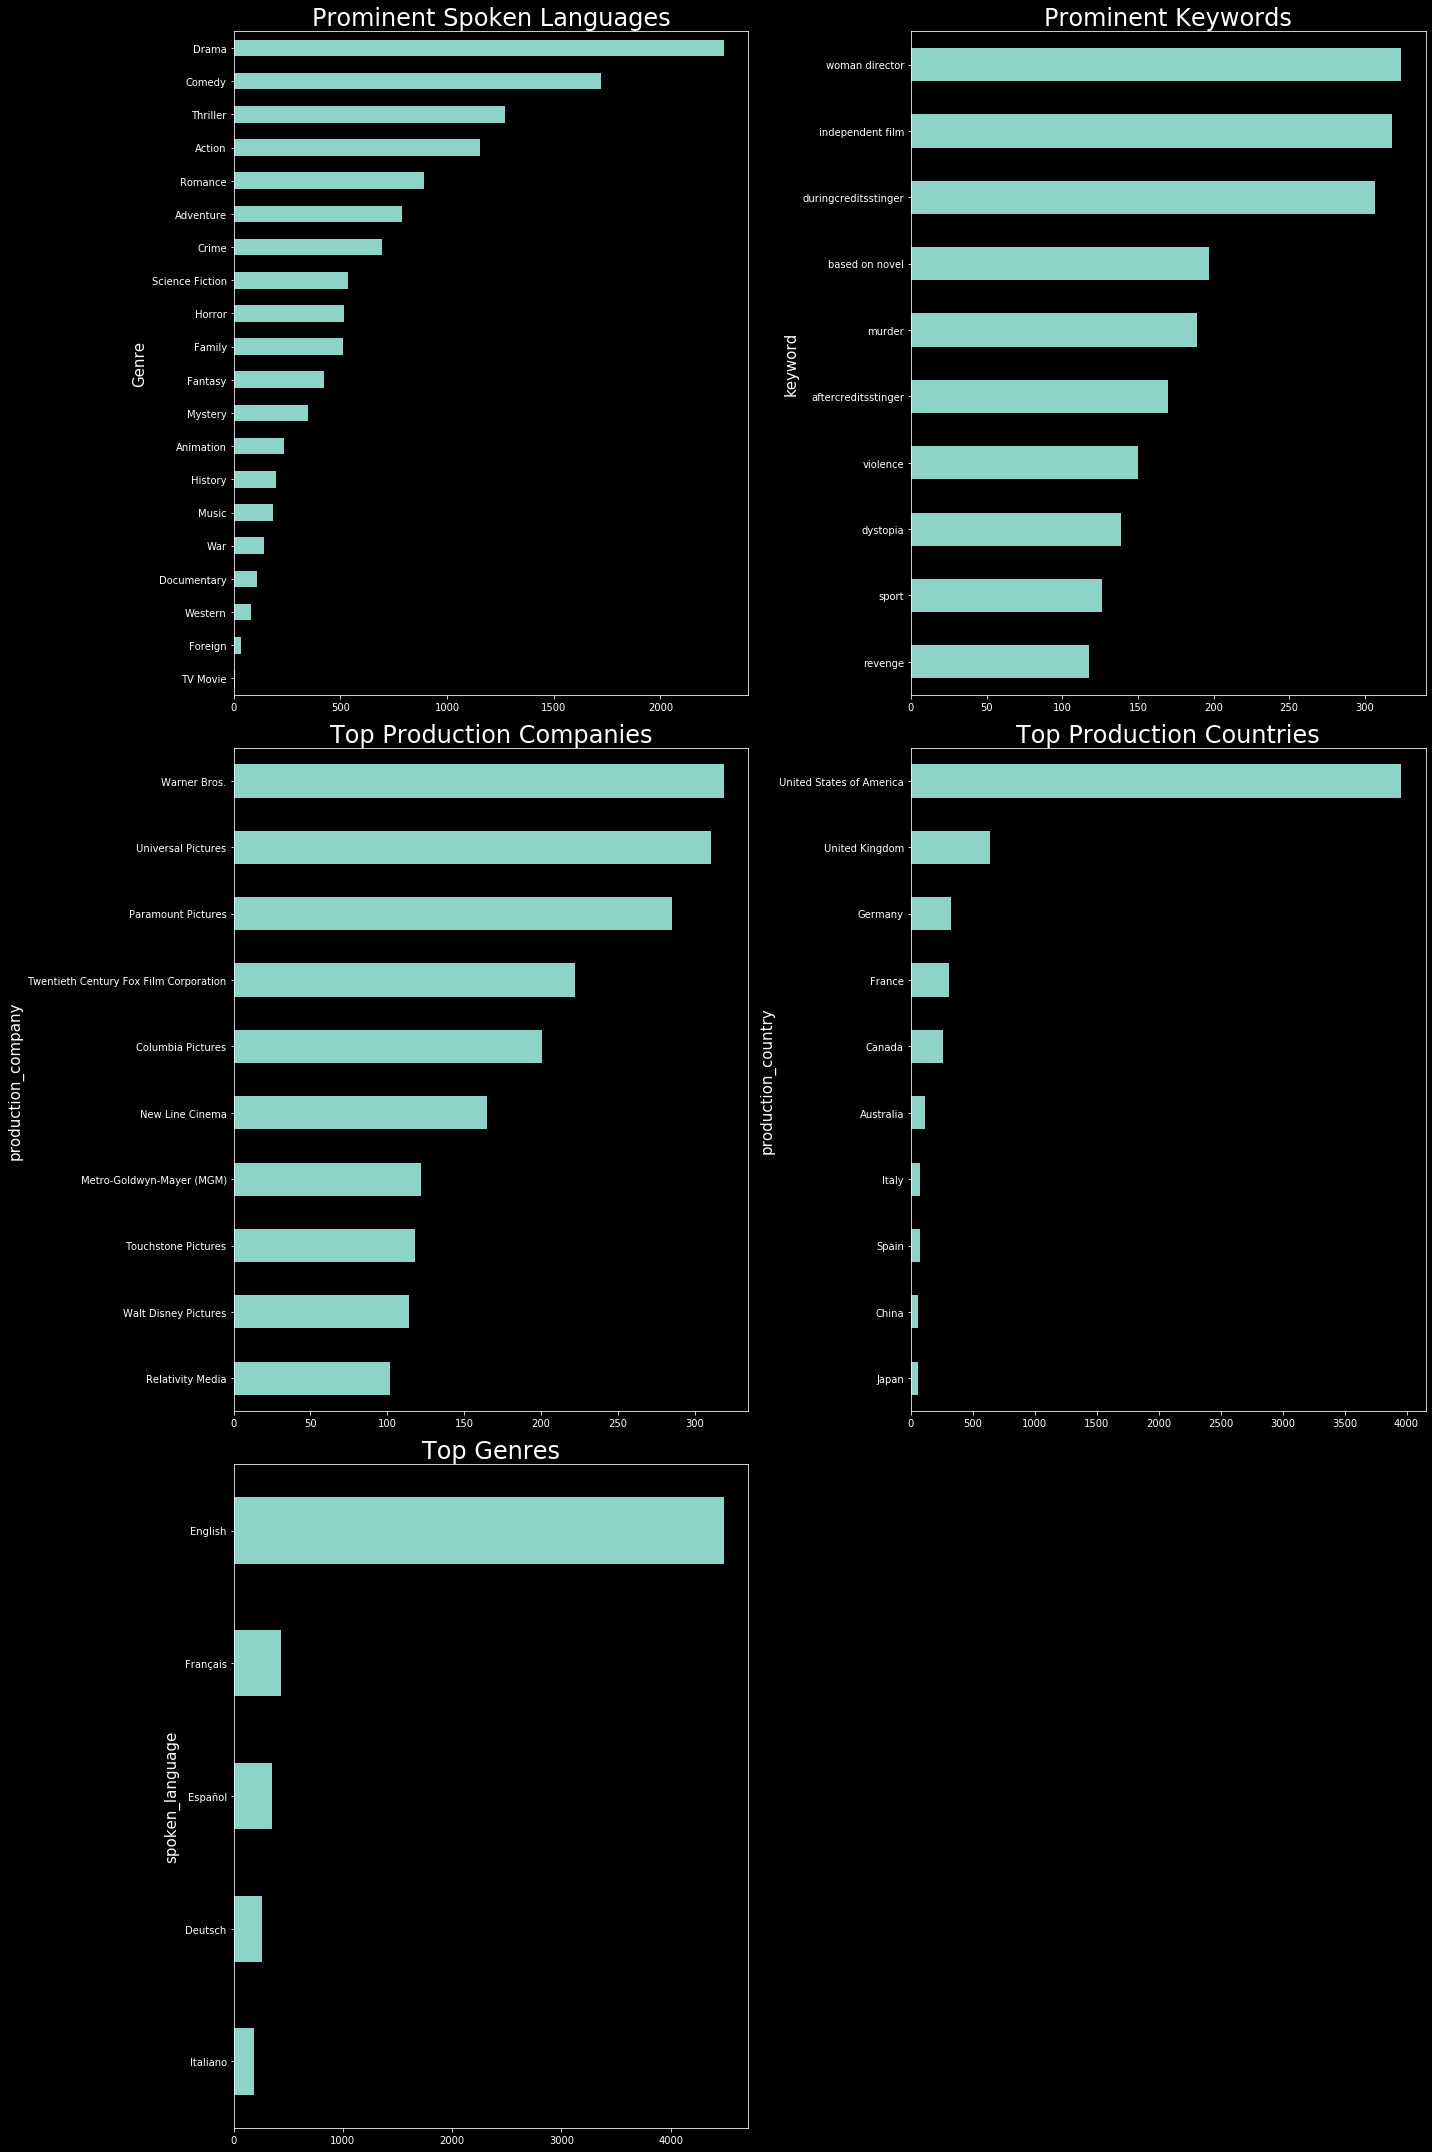

In [25]:
#initiate subpots for the following columns
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
genres['name'].value_counts().sort_values().plot.barh(ax=ax[0][0])
keywords['name'].value_counts().sort_values().tail(10).plot.barh(ax=ax[0][1])
production_companies['name'].value_counts().sort_values().tail(10).plot.barh(ax=ax[1][0])
production_countries['name'].value_counts().sort_values().tail(10).plot.barh(ax=ax[1][1])
spoken_languages['name'].value_counts().sort_values().tail().plot.barh(ax=ax[2][0])

#set label for each of subplot
ax[2][0].set_ylabel("spoken_language", fontsize = 15)
ax[0][1].set_ylabel("keyword", fontsize = 15)
ax[1][0].set_ylabel("production_company", fontsize = 15)
ax[1][1].set_ylabel("production_country", fontsize = 15)
ax[0][0].set_ylabel("Genre",fontsize = 15)
ax[2][1].axis("off")

#set title for each subplot
ax[2][0].set_title("Top Genres", fontsize = 24)
ax[0][1].set_title("Prominent Keywords", fontsize = 24)
ax[1][0].set_title("Top Production Companies", fontsize = 24)
ax[1][1].set_title("Top Production Countries", fontsize = 24)
ax[0][0].set_title("Prominent Spoken Languages", fontsize = 24)
fig.tight_layout()

In [26]:
movies["release_date"] = pd.to_datetime(movies["release_date"]) #convert release date to datetime
movies["release_year"] = movies["release_date"].dt.year #extract release year
movies["release_month"] = movies["release_date"].dt.month  #extract release month
movies.drop(["release_date"], axis=1, inplace=True)

### Data Distribution

From our inspection earlier, we noticed that columns such as revenue, budget, vote count and vote average have zero values. For these not to skew our analysis, we will remove the zero values from the dataset. I will have to treat them individually because the zero values might not be necesarily constant throughout the data. That is, rows having zero values in revenue might not necesarily have zero values in budget, for instance.

In [27]:
#extract non-zero data for thes columns
movies_1 = movies[movies['revenue']!=0]
movies_2 = movies[movies['budget']!=0]
movies_3 = movies[movies['vote_count']!=0]
movies_4 = movies[movies['vote_average']!=0]
movies_5 = movies[movies['runtime']>0]

Now, we are going to examine the general distribution of important values in our dataset.

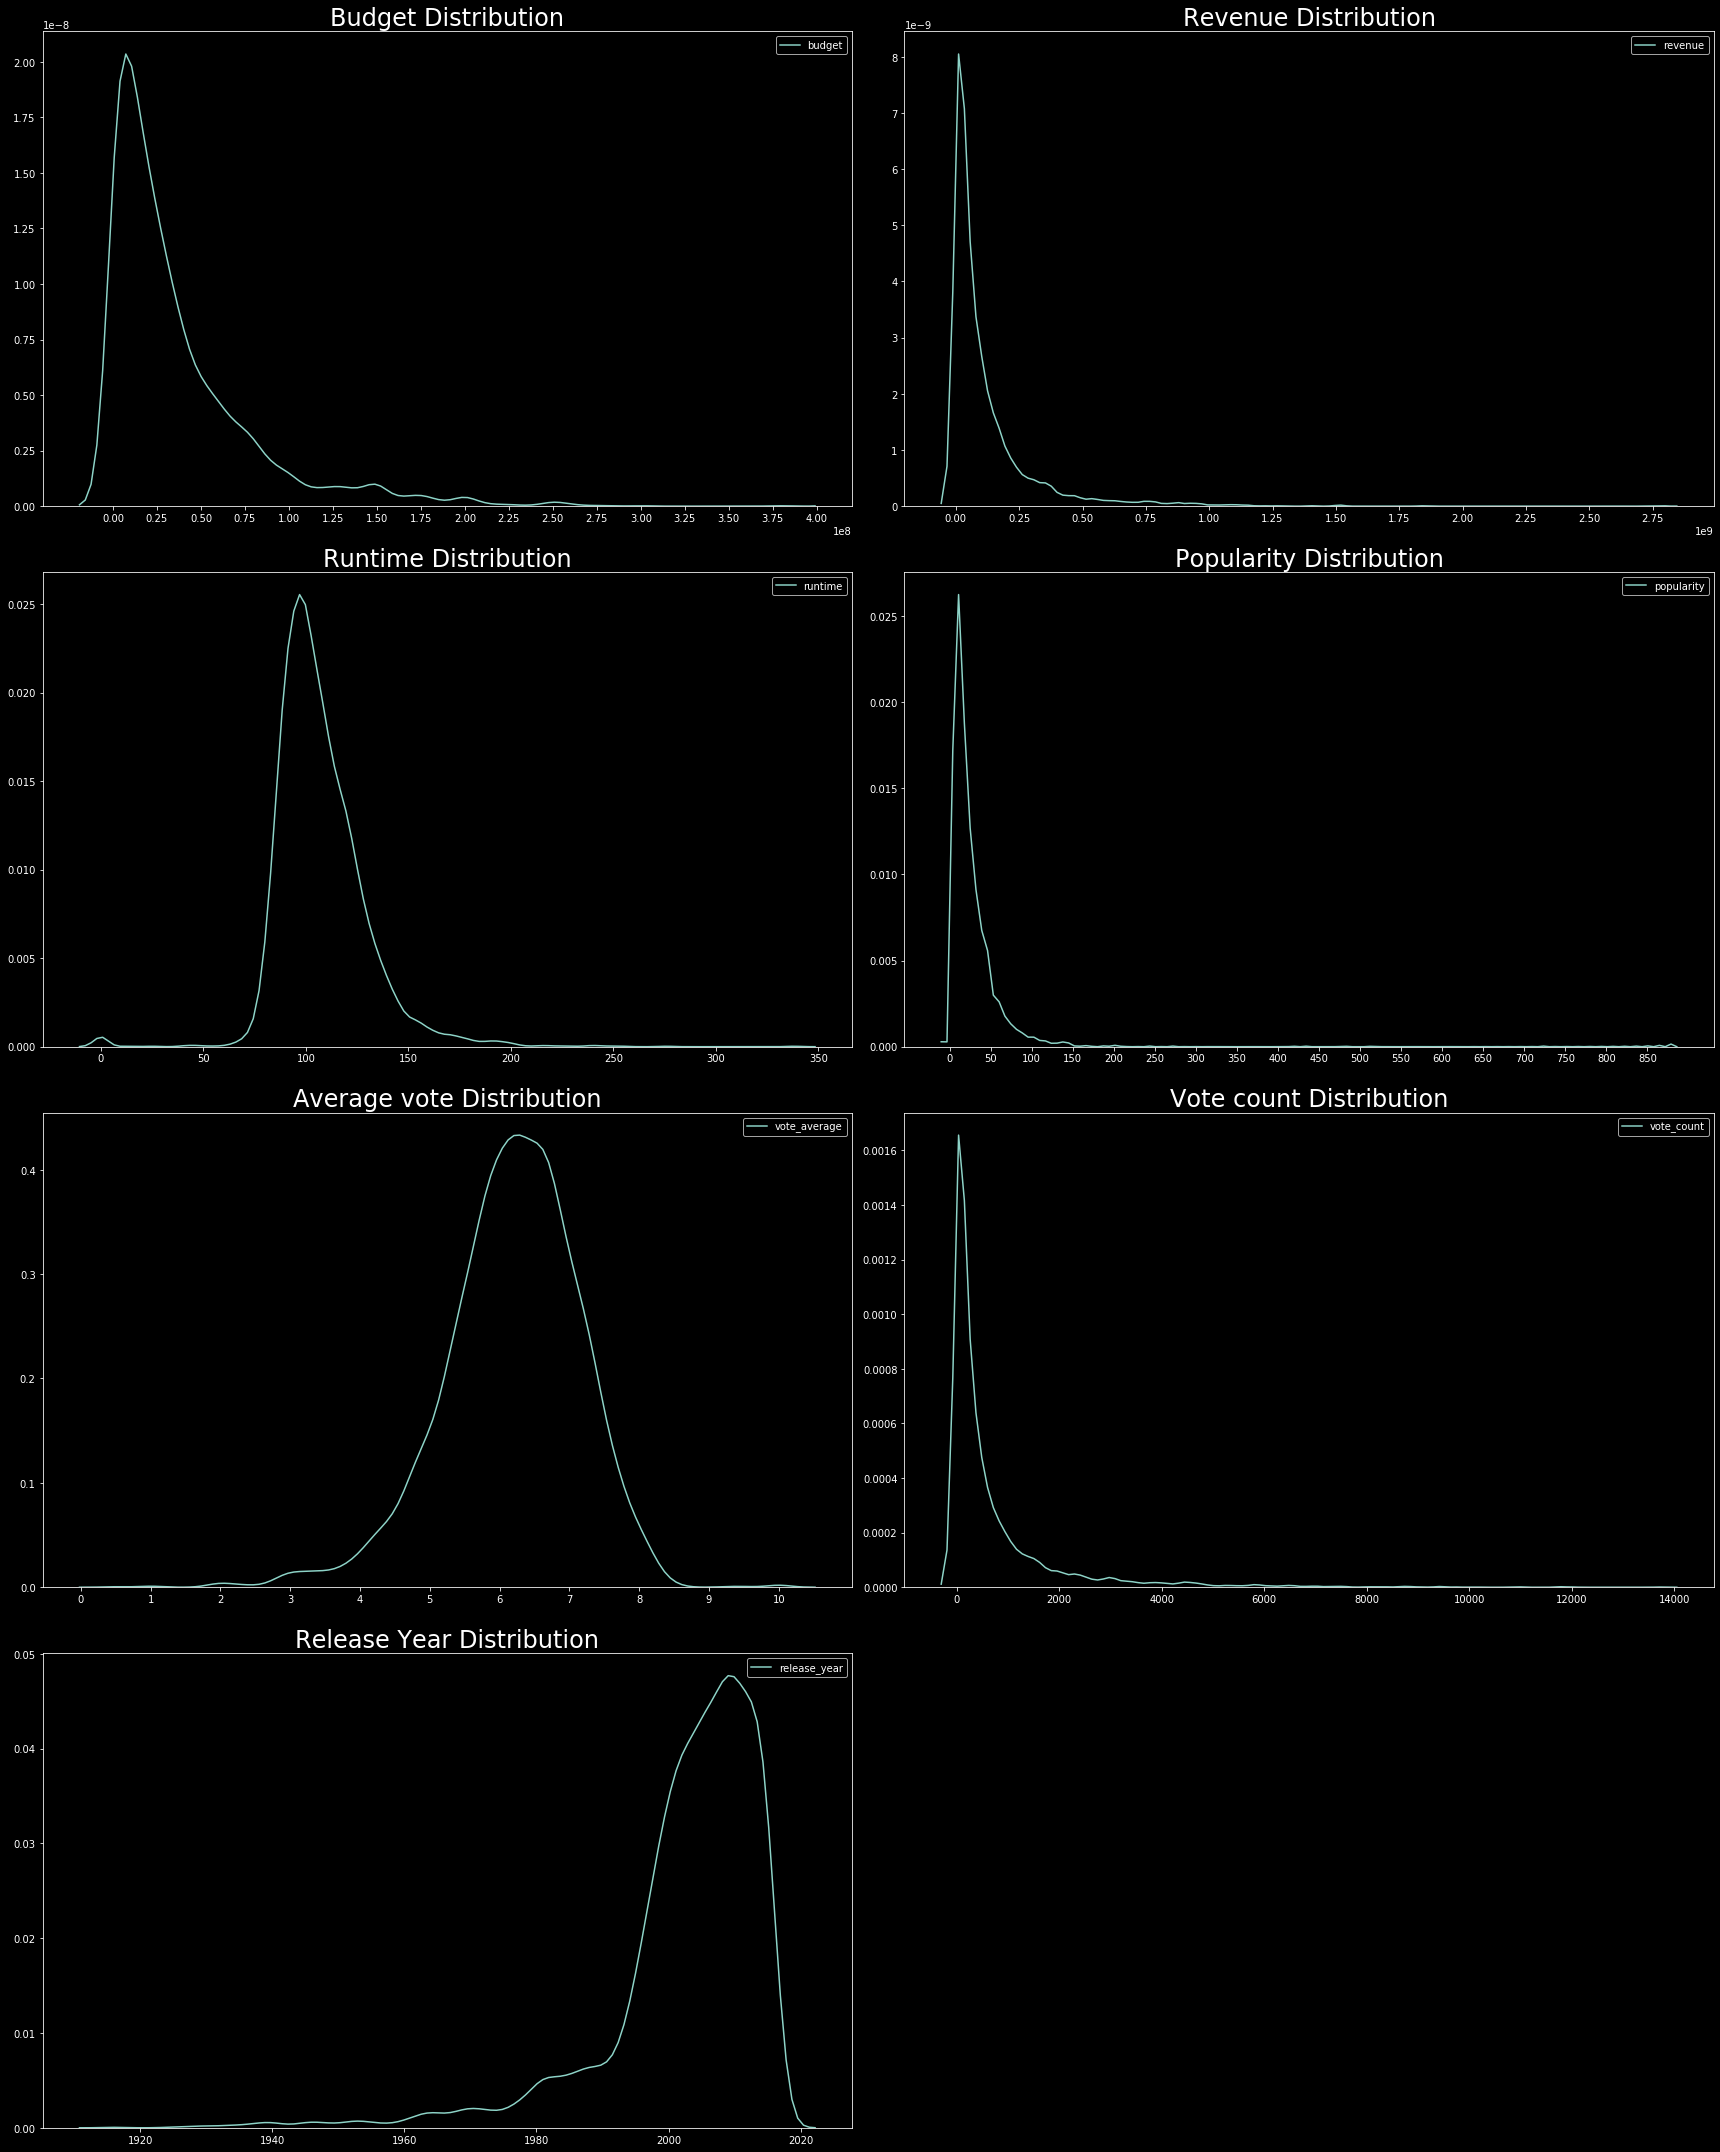

In [28]:
#Initiate KDE subplots for numerical columns
fig, axarr = plt.subplots(4, 2, figsize=(24, 30))
sns.kdeplot(movies_2["budget"], ax=axarr[0][0])
axarr[0][0].xaxis.set_ticks(np.arange(0, 4.25e8, 0.25e8))

sns.kdeplot(movies_1["revenue"], ax=axarr[0][1])
axarr[0][1].xaxis.set_ticks(np.arange(0, 3e9, 0.25e9))
sns.kdeplot(movies_4["runtime"], ax=axarr[1][0])

sns.kdeplot(movies["popularity"], ax=axarr[1][1])
axarr[1][1].xaxis.set_ticks(np.arange(0, 900, 50))

sns.kdeplot(movies_4["vote_average"], ax=axarr[2][0])
axarr[2][0].xaxis.set_ticks(np.arange(0, 11, 1))

sns.kdeplot(movies_3["vote_count"], ax=axarr[2][1])
sns.kdeplot(movies["release_year"], ax=axarr[3][0])

axarr[3][1].axis("off")

#set subplot titles
axarr[0][0].set_title('Budget Distribution', fontsize = 24)
axarr[0][1].set_title('Revenue Distribution', fontsize = 24)
axarr[1][0].set_title('Runtime Distribution', fontsize = 24)
axarr[1][1].set_title('Popularity Distribution', fontsize = 24)
axarr[2][0].set_title('Average vote Distribution', fontsize = 24)
axarr[2][1].set_title('Vote count Distribution', fontsize = 24)
axarr[3][0].set_title('Release Year Distribution', fontsize = 24)


fig.tight_layout()

From the results above, we can see that most films in our dataset have a budget of less than $10 million and an grossed revenue of less than $100 million. We can also see that most films have a runtime of around 100 minutes or 1 hour and 45 minutes. In terms of film acclaim and recognition in our dataset, we can see that most films have a popularity score around 20, with a vote average score usually between 6.0 and 7.0, and a vote count numbering less than 500. 

### Release Year and Month

In [29]:
monthly_revenue = movies_1.groupby('release_month')['revenue'].sum().to_frame().reset_index()
avg_monthly_revenue =  movies_1.groupby('release_month')['revenue'].mean().to_frame().reset_index()

IndexError: index 2 is out of bounds for axis 0 with size 2

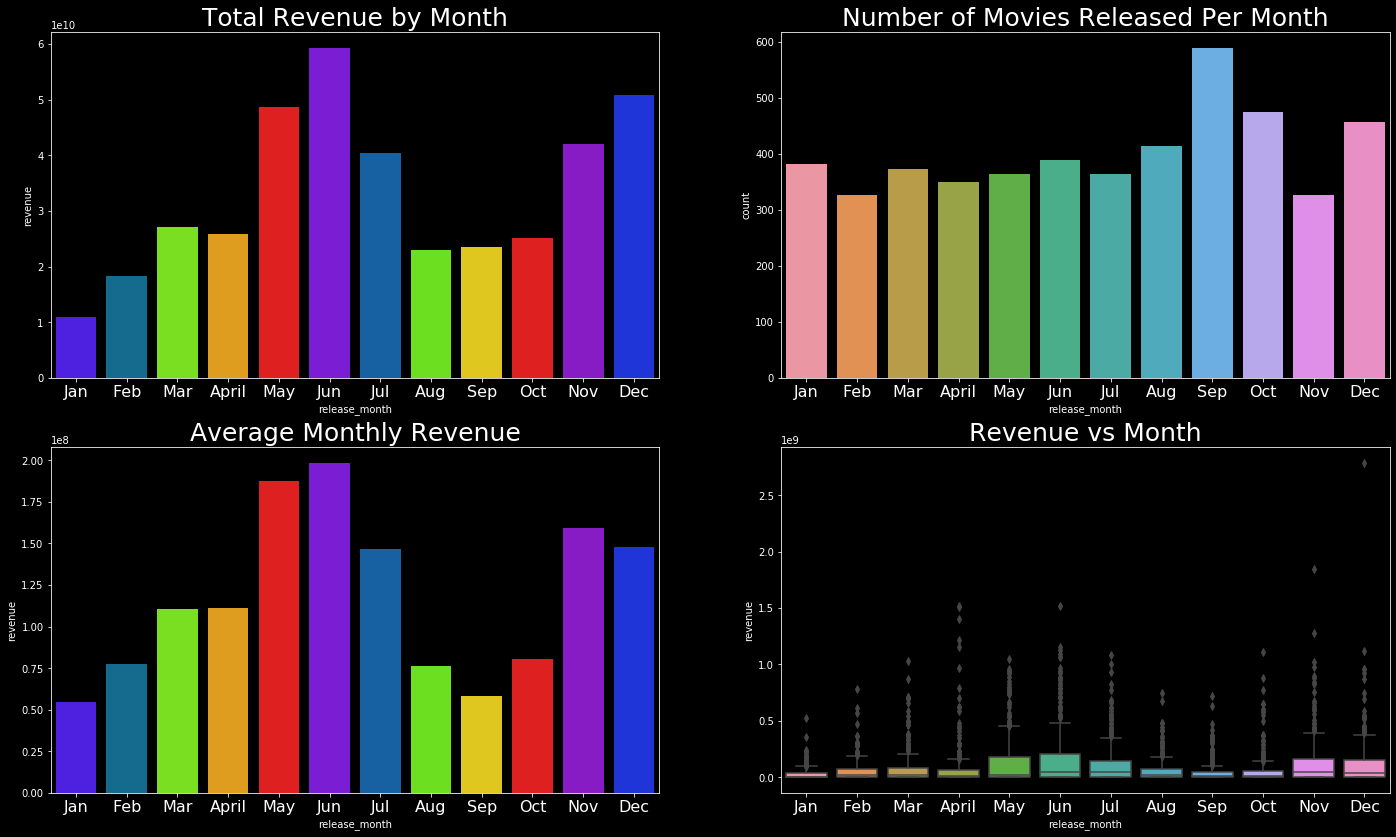

In [30]:
#Initiate subplots for different distribution of revenue by relese month
fig, axarr = plt.subplots(2,2, figsize=(24, 14))
sns.boxplot(x = 'release_month', y = 'revenue', data = movies, ax = axarr[1][1])
sns.barplot(x='release_month', y = 'revenue', data = monthly_revenue, ax = axarr[0][0], palette = 'prism')
sns.countplot(movies["release_month"], ax=axarr[0][1])
sns.barplot(x='release_month', y = 'revenue', data = avg_monthly_revenue, ax = axarr[1][0], palette = 'prism')

#set plot titles
axarr[1][1].set_title('Revenue vs Month', fontsize = 25)
axarr[0][0].set_title('Total Revenue by Month', fontsize = 25)
axarr[0][1].set_title('Number of Movies Released Per Month', fontsize = 25)
axarr[1][0].set_title('Average Monthly Revenue', fontsize = 25)

#add customized labels to plots
labels = ['Jan', 'Feb', 'Mar','April', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    axarr[i][0].set_xticklabels(labels,fontsize = 16)
    axarr[i][1].set_xticklabels(labels,fontsize = 16)
fig.tight_layout()

Looking at the release dates of films in our dataset,  it primarily contains films released after 1990, fairly distributed across all months of the year, with most movies released in September. Movies released in June, however,showed the highest financial success followed closely by may, with January and September grossing the lowest. Volume doesn't necesarily translate to revenue, it seems. Since the high performing months are closely related to the summer months and festive periods, it is safe to say that holidays contributed to thier financial success. 

### Revenue's Correlation with other Numerical Data

Text(0.5, 1, 'Revenue vs Vote Count')

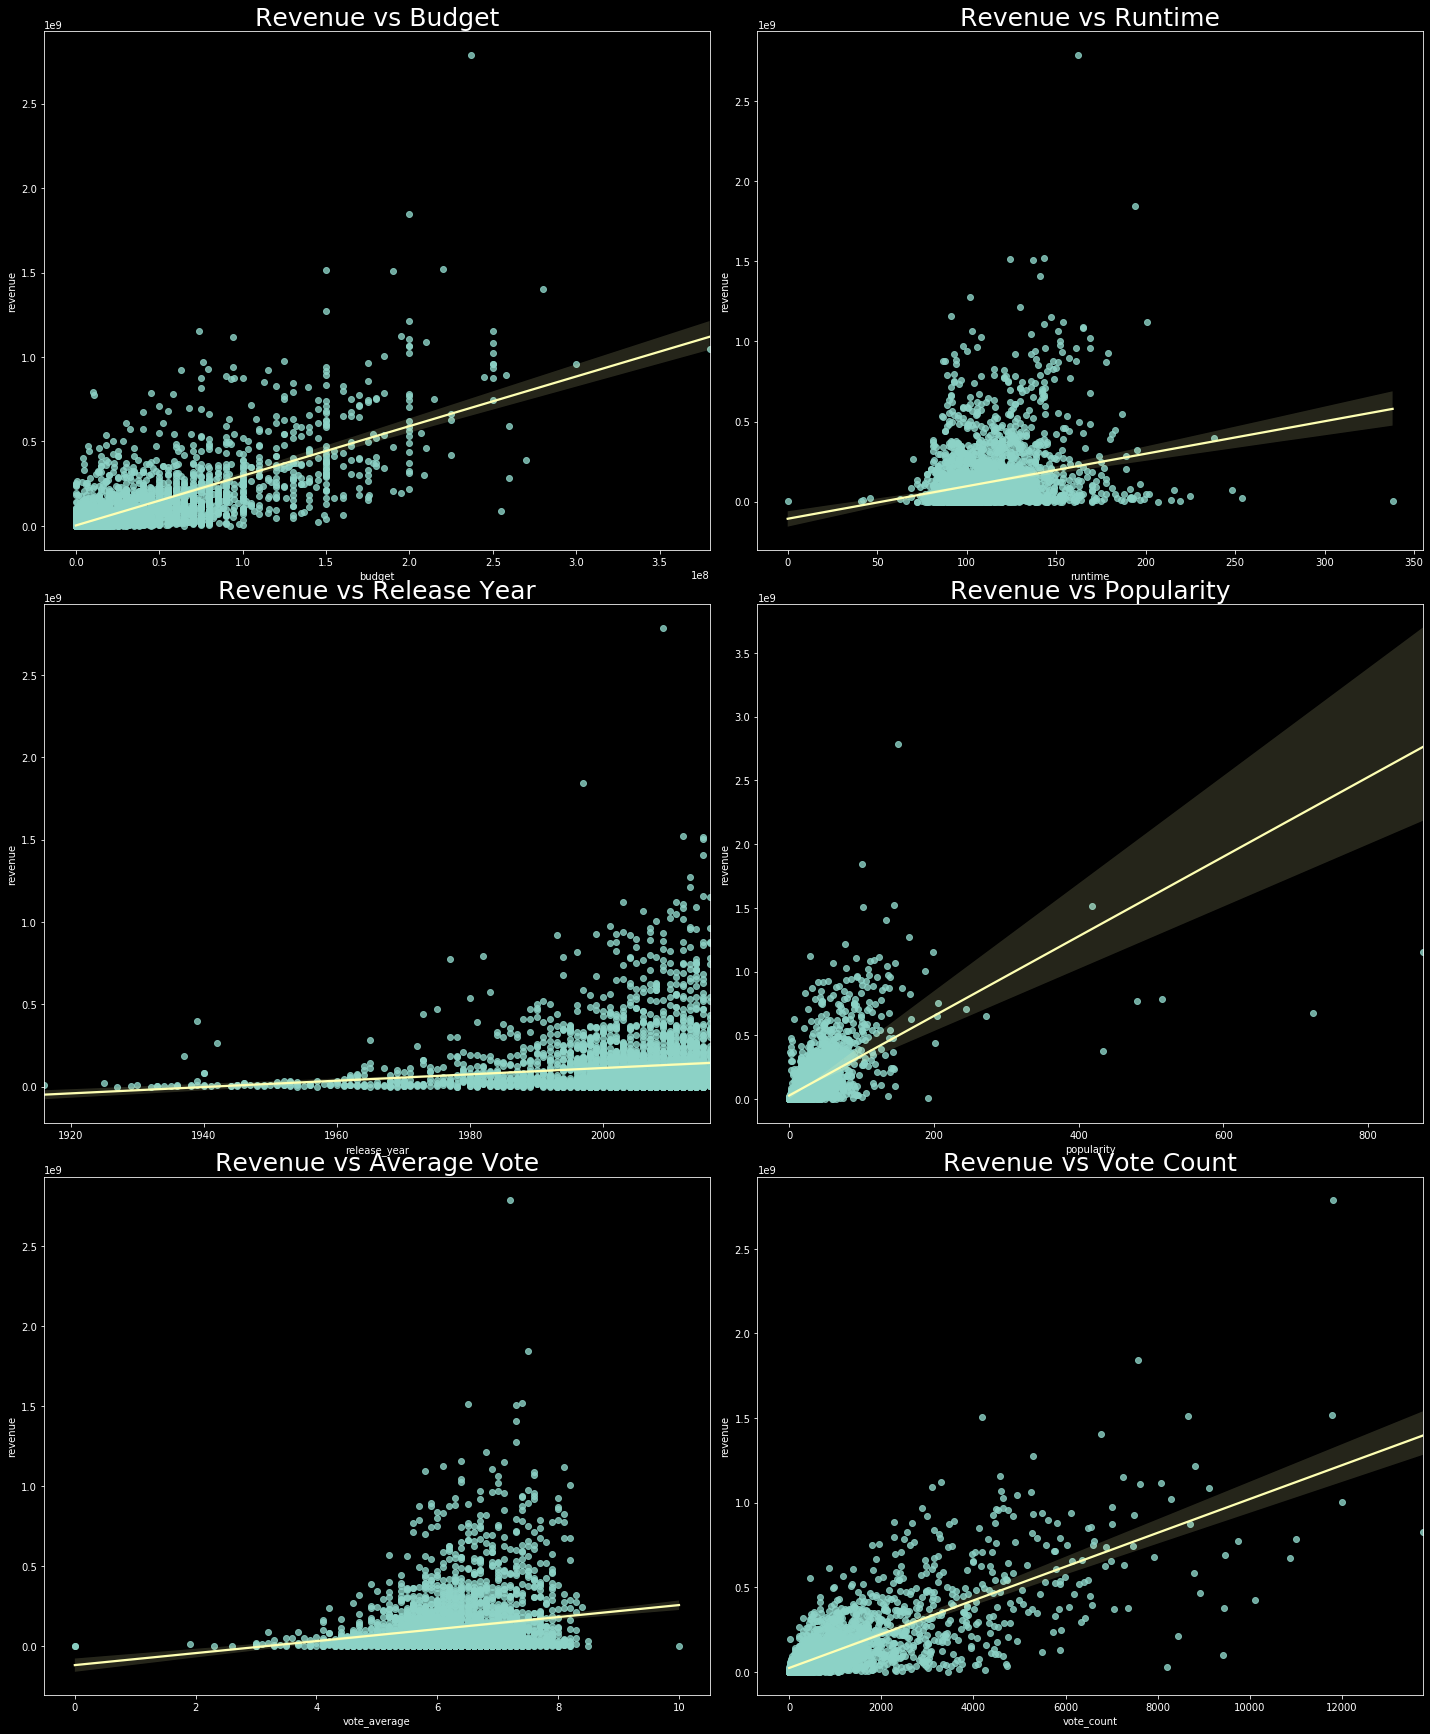

In [31]:
# Innitiate scatter plots with correlation lines
fig, axarr = plt.subplots(3, 2, figsize=(20, 24))
p_color = dict(color="C0")
l_color = dict(color="C1")
sns.regplot(x="budget", y="revenue", data=movies_1, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[0][0])
sns.regplot(x="runtime", y="revenue", data=movies_1, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[0][1])
sns.regplot(x="release_year", y="revenue", data=movies_1, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[1][0])
sns.regplot(x="popularity", y="revenue", data=movies_1, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[1][1])
sns.regplot(x="vote_average", y="revenue", data=movies_1, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[2][0])
sns.regplot(x="vote_count", y="revenue", data=movies_1, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[2][1])
fig.tight_layout()
axarr[0][0].set_title('Revenue vs Budget', fontsize = 25)
axarr[0][1].set_title('Revenue vs Runtime', fontsize = 25)
axarr[1][0].set_title('Revenue vs Release Year', fontsize = 25)
axarr[1][1].set_title('Revenue vs Popularity', fontsize = 25)
axarr[2][0].set_title('Revenue vs Average Vote', fontsize = 25)
axarr[2][1].set_title('Revenue vs Vote Count', fontsize = 25)

There is a pronounced correlation between film budget and revenue, with films with higher production costs generally collecting more revenue. There is also interestingly a positive correlation, though less pronounced, between movie runtime and revenue, with longer movies generally accumulating higher revenue. The year a film was released in also doesn't seem to have much impact on the revenue it generates, so we cannot necessarily expect newer films to generate more revenue than older movies on the account of its production year alone. The more revenue a films accumulates unsurprisingly also seems to correlate with its popularity score and the number of votes it receives.This is expected because popularity and vote go hand in hand. High grossing films also seem to garner higher vote ratings, though this positive correlation is less pronounced than that between revenue and popularity and vote count.

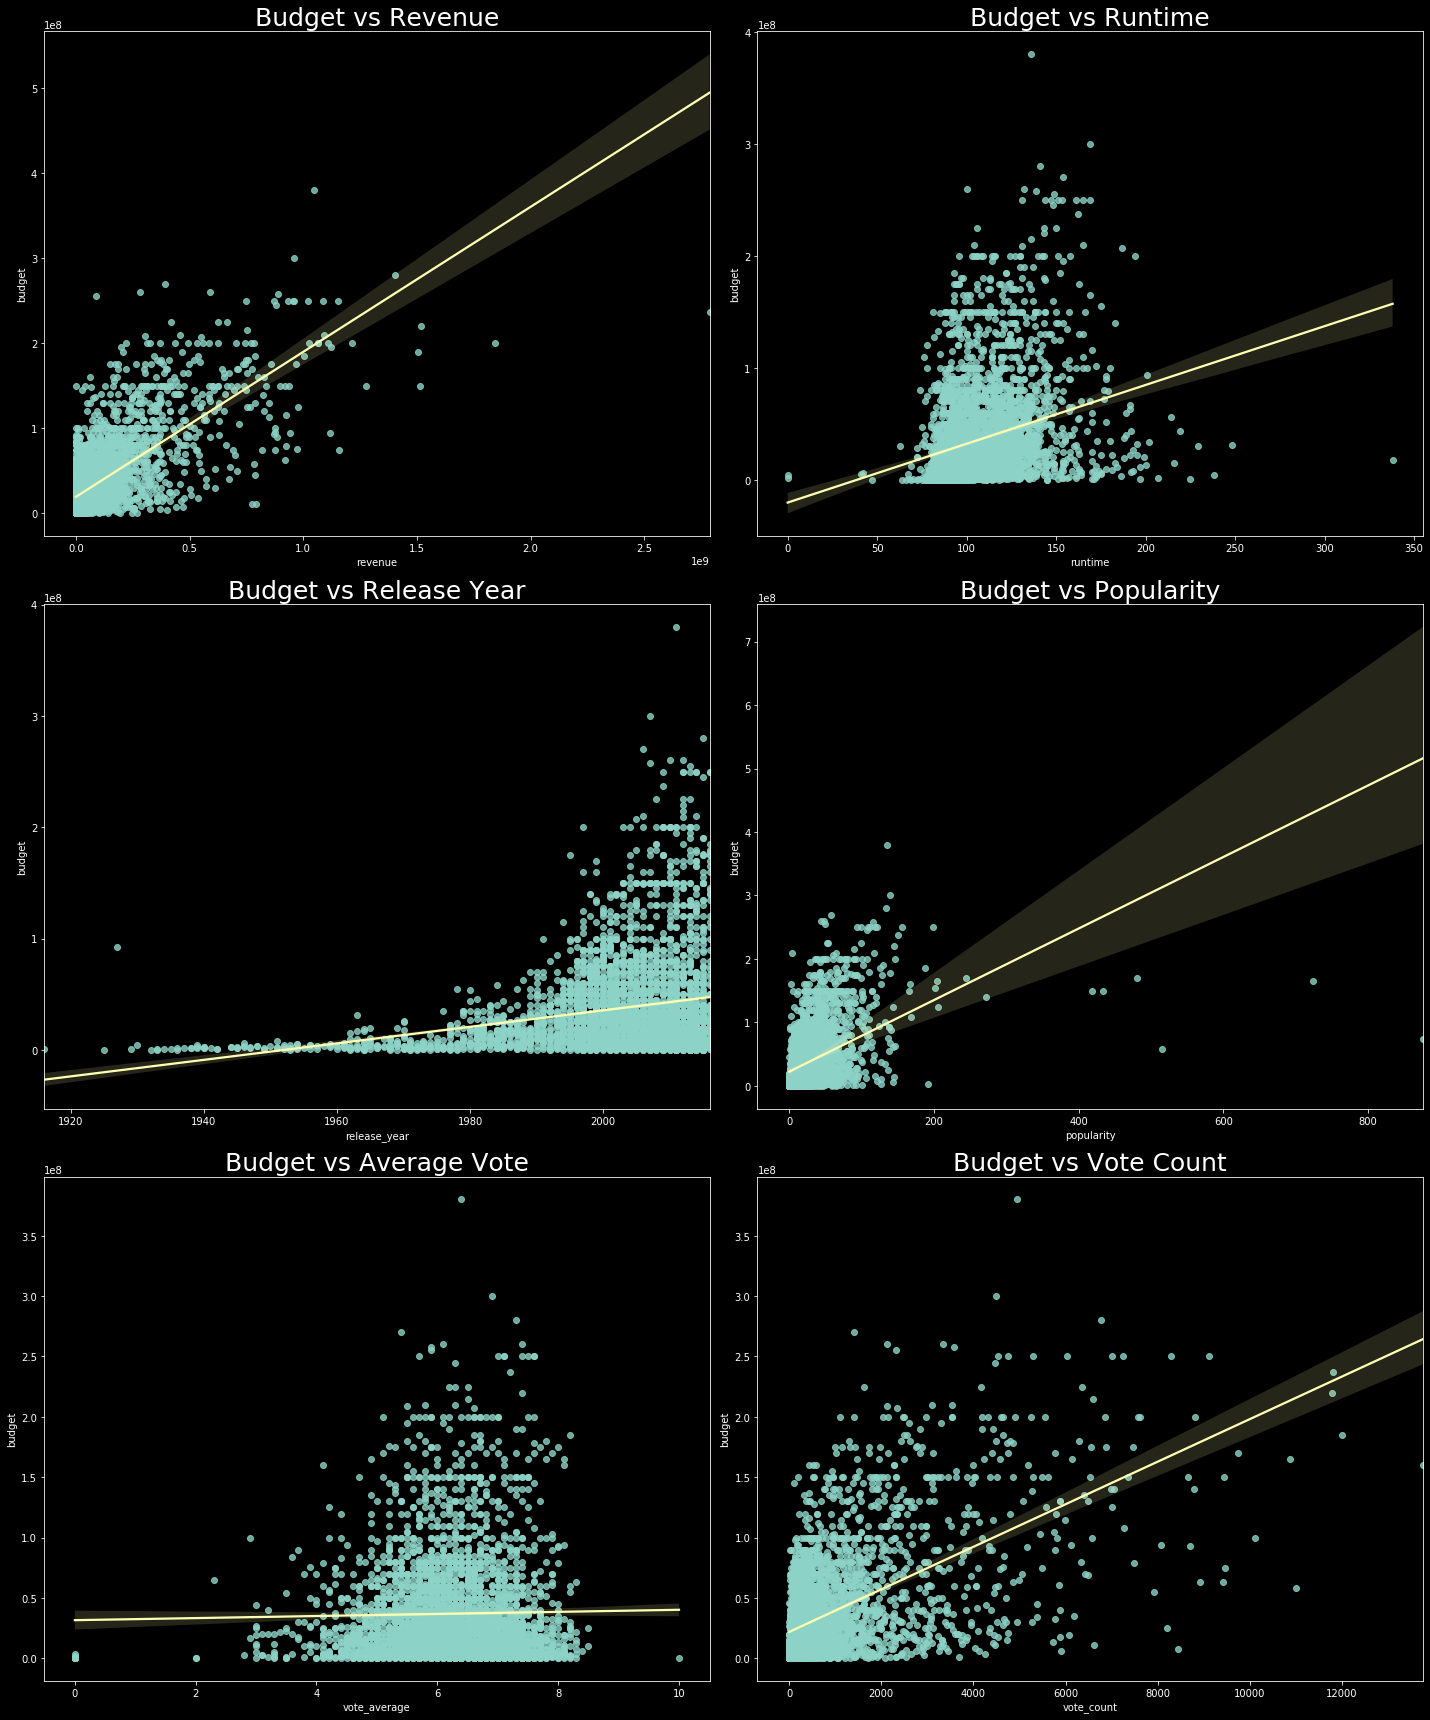

In [32]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 24))
p_color = dict(color="C0")
l_color = dict(color="C1")
sns.regplot(x="revenue", y="budget", data=movies_2, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[0][0])
sns.regplot(x="runtime", y="budget", data=movies_2, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[0][1])
sns.regplot(x="release_year", y="budget", data=movies_2, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[1][0])
sns.regplot(x="popularity", y="budget", data=movies_2, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[1][1])
sns.regplot(x="vote_average", y="budget", data=movies_2, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[2][0])
sns.regplot(x="vote_count", y="budget", data=movies_2, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[2][1])

#Set title for each plot
axarr[0][0].set_title('Budget vs Revenue', fontsize = 25)
axarr[0][1].set_title('Budget vs Runtime', fontsize = 25)
axarr[1][0].set_title('Budget vs Release Year', fontsize = 25)
axarr[1][1].set_title('Budget vs Popularity', fontsize = 25)
axarr[2][0].set_title('Budget vs Average Vote', fontsize = 25)
axarr[2][1].set_title('Budget vs Vote Count', fontsize = 25)
fig.tight_layout()

Budget has similar trends with revenue, as observed earlier. However, there is no pronunced correlation between average vote and budget.

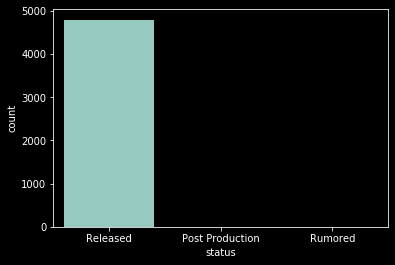

In [33]:
sns.countplot(movies["status"])

Overwhelmly, the movies in the data set are already released. This distribution is one sided. It's best we drop this column.

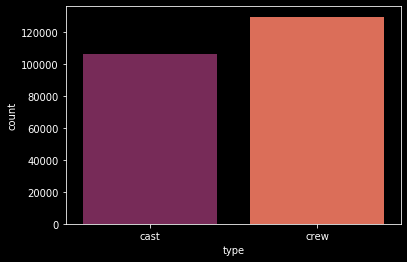

In [34]:
sns.countplot(people["type"], palette = 'rocket')

Over the years, the movie industry has had more people working as crew than cast. There are always more people working behind the scenes. However, to be able to understand, for instance, how people can easily get into the movie industry, we need the unique values for cast and crew. 

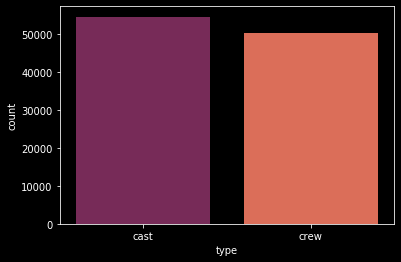

In [35]:
sns.countplot(people.drop_duplicates(["id"])["type"], palette = 'rocket')

On the unique level, there are actually more cast than crew. This shows that, over the years, more fresh individuals get into the movie industry as a cast member than as a crew member.

### Gender Distribution

C:\Users\MAINGATE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\MAINGATE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


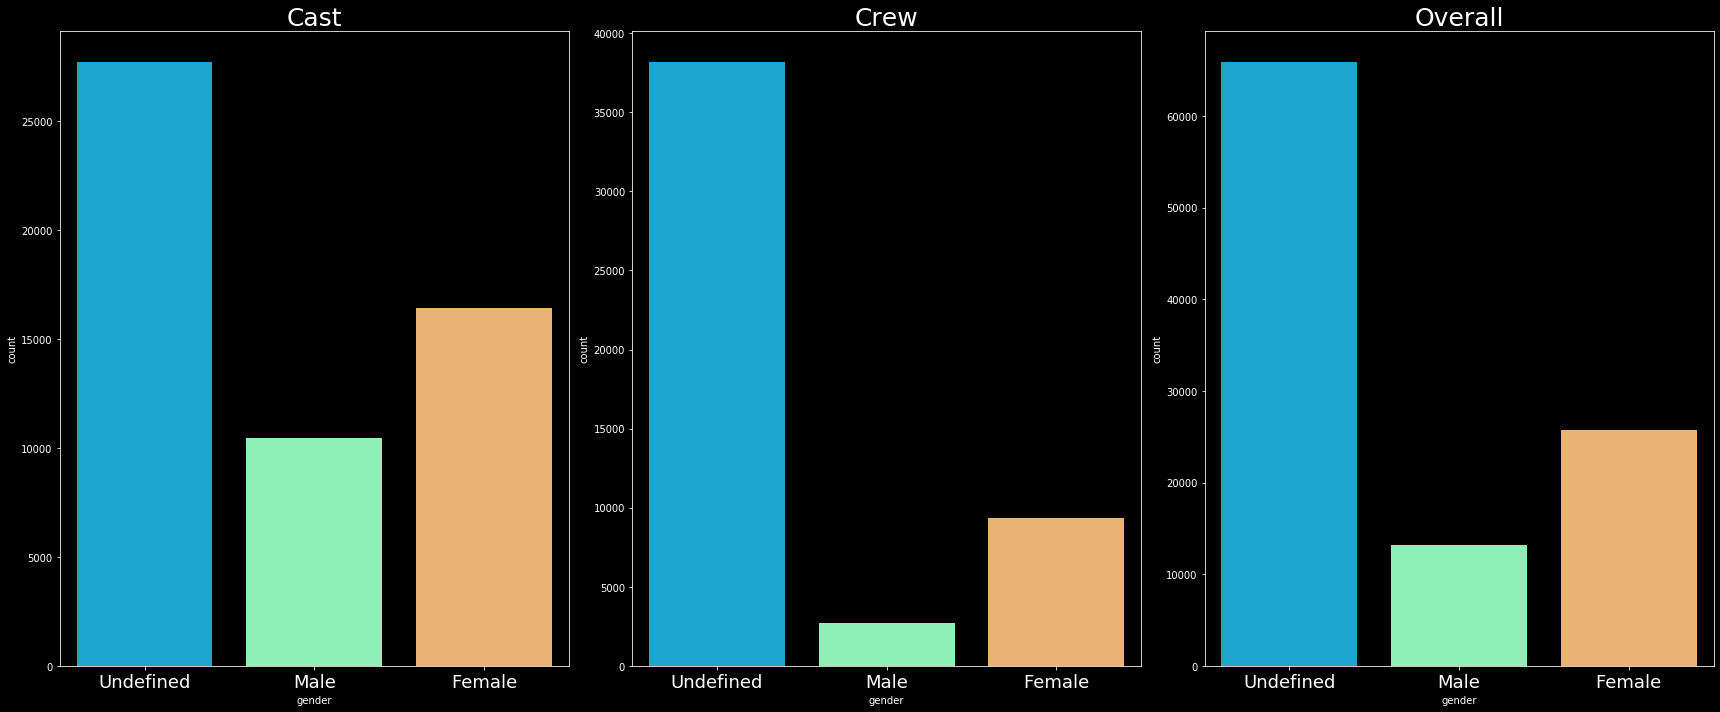

In [36]:
fig, axarr= plt.subplots(1, 3, figsize=(24, 10))
sns.countplot(people.drop_duplicates(["id"])[people["type"] == "cast"]["gender"], ax=axarr[0], palette = 'rainbow')
sns.countplot(people.drop_duplicates(["id"])[people["type"] == "crew"]["gender"], ax=axarr[1], palette = 'rainbow')
sns.countplot(people.drop_duplicates(["id"])["gender"], ax=axarr[2], palette = 'rainbow')
axarr[0].set_title("Cast", fontsize = 25)
axarr[1].set_title("Crew", fontsize = 25)
axarr[2].set_title("Overall", fontsize = 25)
for i in range(3):
    axarr[i].set_xticklabels(["Undefined", "Male", "Female"],fontsize = 18)
fig.tight_layout()

While there are more females than males in both cast and crew, the number of undefined gender is too high for us to conclude.

 ### Prevalent Jobs an Department

Text(0.5, 1, 'Most Prevalent Jobs')

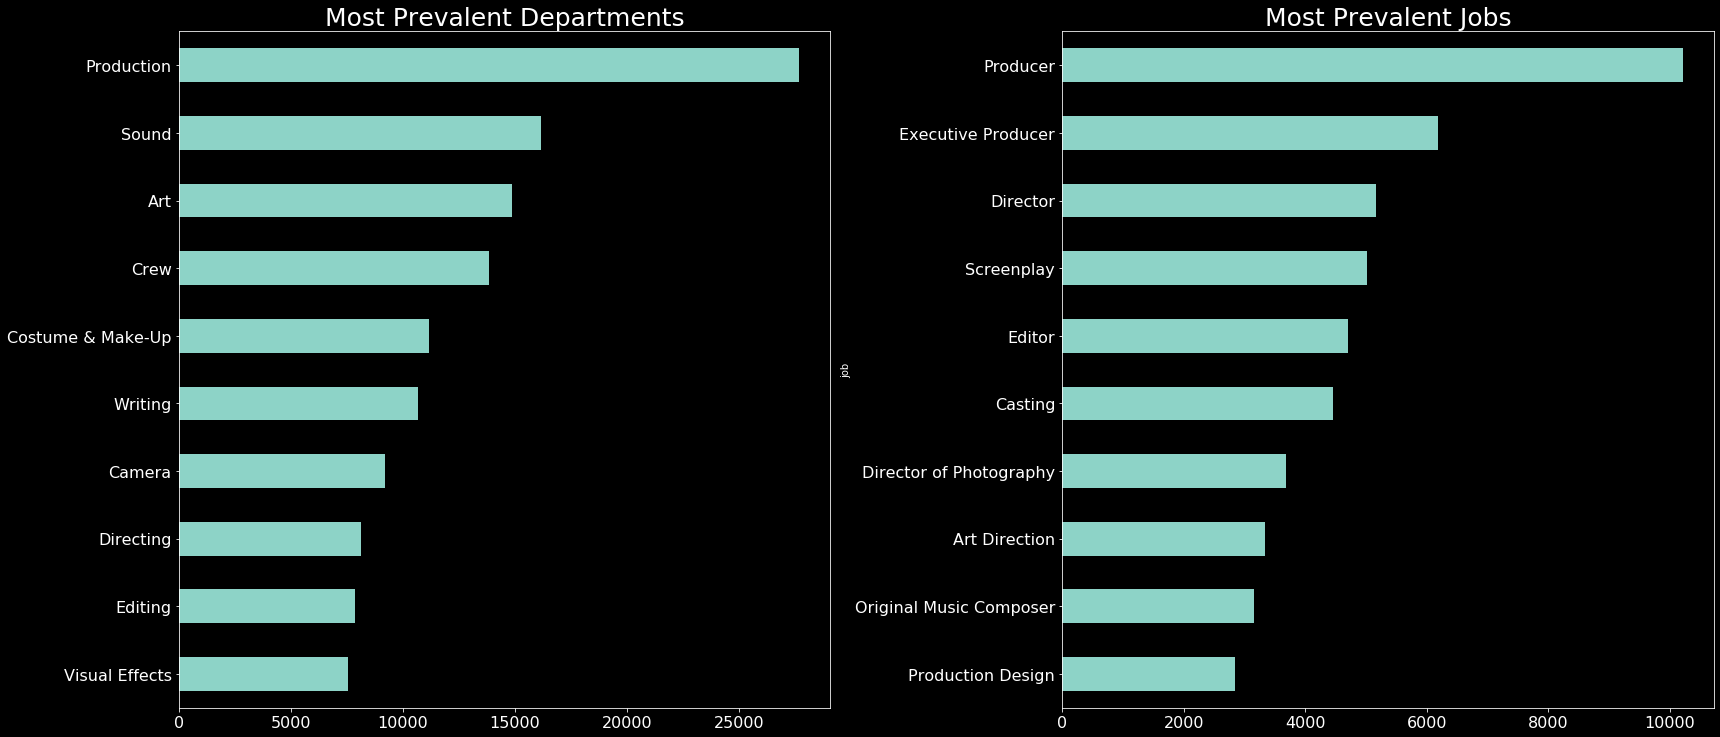

In [37]:
fig, axarr = plt.subplots(1, 2, figsize=(24, 10))
people["department"].value_counts().sort_values().tail(10).plot.barh(ax=axarr[0], fontsize = 16)
people["job"].value_counts().sort_values(ascending = True).tail(10).plot.barh(ax=axarr[1], fontsize = 16)
axarr[1].set_ylabel("job")
fig.tight_layout()
axarr[0].set_title('Most Prevalent Departments', fontsize = 25)
axarr[1].set_title('Most Prevalent Jobs', fontsize = 25)

Now, here is the councel: If you are thinking of breaking into the movie industry, consider anything from production to visual effects. Acting didn't make the top 10. 

### Blockbusters

In [38]:
popular_m = movies.groupby('original_title')['popularity'].sum().to_frame().reset_index().sort_values('popularity', ascending = False)

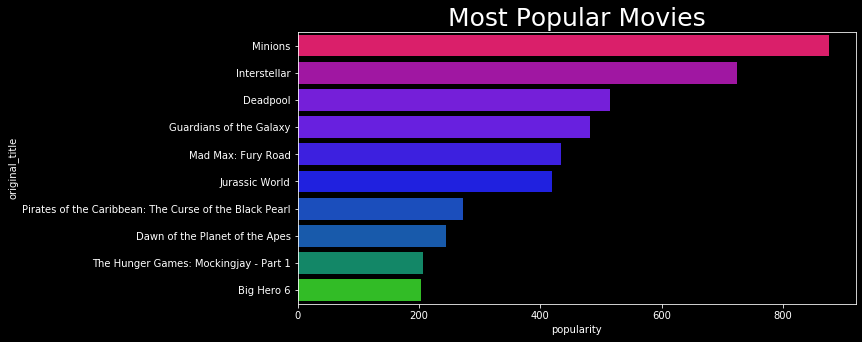

In [39]:
plt.figure(figsize = (10,5))
sns.barplot(y = 'original_title', x ='popularity', data = popular_m.iloc[:10], palette = 'prism')
plt.title('Most Popular Movies', fontsize = 25)
plt.style.use("dark_background")

Text(0.5, 1.0, 'Big Budget Movies')

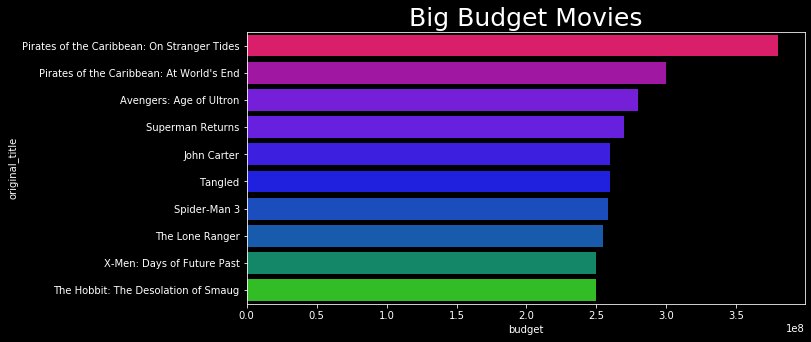

In [40]:
big_budget = movies.sort_values('budget', ascending = False)

plt.figure(figsize = (10,5))
sns.barplot(y = 'original_title', x ='budget', data = big_budget.iloc[:10], palette = 'prism')
plt.title('Big Budget Movies', fontsize = 25)

#### To be continued...